<a href="https://colab.research.google.com/github/hwangsaeyeon/AirbnbAnalysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install

In [ ]:
!pip3 uninstall googletrans
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 8.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=869d7de27c93f06b85f56e6012a5e07acbd0666de73c5ab39293e32cad4f0f1c
  Stored in directory: /root/.cache/pip/wheels/dd/59/af/8d6c96a719763990f1c548e36b17d9efdfb767f42f7ff39f53
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
 

In [ ]:
!apt-get update -qq

In [ ]:
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.13.1-2ubuntu3).
fontconfig set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 40.6 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Data Load

In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/drive/MyDrive/Airbnb/reviews.csv")
listings = pd.read_csv('/content/drive/MyDrive/Airbnb/listings_full.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
#listing 파일 수정 
new_lst = listings[['id','listing_url','picture_url','host_is_superhost','neighbourhood_cleansed','neighbourhood_group_cleansed',
          'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','name','price']]
new_lst['safety'] = new_lst['neighbourhood_cleansed']
#new_lst['wdcloud_eng'] = new_lst['id']
#new_lst['wdcloud_kor'] = new_lst['id']
#new_lst['summ'] = new_lst['id']
#new_lst['kor_summ'] = new_lst['id']
#new_lst['neg'] = new_lst['id']
#new_lst['kor'] = new_lst['id']
new_lst

<ipython-input-3-790b29eac07a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['safety'] = new_lst['neighbourhood_cleansed']


,id,listing_url,picture_url,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,name,price,safety
0,2539,https://www.airbnb.com/rooms/2539,https://a0.muscache.com/pictures/3949d073-a02e...,f,Kensington,Brooklyn,9,4.89,4.88,5.00,5.00,5.00,4.75,4.88,Clean & quiet apt home by the park,$299.00,Kensington
1,2595,https://www.airbnb.com/rooms/2595,https://a0.muscache.com/pictures/f0813a11-40b2...,f,Midtown,Manhattan,49,4.68,4.73,4.63,4.77,4.80,4.81,4.40,Skylit Midtown Castle,$175.00,Midtown
2,5121,https://www.airbnb.com/rooms/5121,https://a0.muscache.com/pictures/2090980c-b68e...,t,Bedford-Stuyvesant,Brooklyn,50,4.52,4.22,4.09,4.91,4.91,4.47,4.52,BlissArtsSpace!,$60.00,Bedford-Stuyvesant
3,45910,https://www.airbnb.com/rooms/45910,https://a0.muscache.com/pictures/27117627/19ff...,f,Ridgewood,Queens,13,4.42,4.64,4.36,4.82,5.00,4.82,4.55,Beautiful Queens Brownstone! - 5BR,$425.00,Ridgewood
4,5136,https://www.airbnb.com/rooms/5136,https://a0.muscache.com/pictures/miso/Hosting-...,f,Sunset Park,Brooklyn,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,"Spacious Brooklyn Duplex, Patio + Garden",$275.00,Sunset Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,https://www.airbnb.com/rooms/43728504,https://a0.muscache.com/pictures/6c950656-b090...,f,Rockaway Park,Queens,33,4.91,4.97,4.88,4.97,5.00,4.94,4.88,Private Modern House by The Beach,$157.00,Rockaway Park
39877,44578886,https://www.airbnb.com/rooms/44578886,https://a0.muscache.com/pictures/dd5163c1-7e02...,t,Upper West Side,Manhattan,52,4.79,4.92,4.75,5.00,4.96,4.81,4.85,Beautiful apartment - minutes to NYC,$108.00,Upper West Side
39878,46355090,https://www.airbnb.com/rooms/46355090,https://a0.muscache.com/pictures/64c81ee7-b396...,f,Bellerose,Queens,11,4.45,4.64,4.27,4.64,4.36,4.36,4.55,"1 Bedroom Basement, NEWLY Renovated",$140.00,Bellerose
39879,698195550745703156,https://www.airbnb.com/rooms/698195550745703156,https://a0.muscache.com/pictures/miso/Hosting-...,f,Williamsburg,Brooklyn,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Luxurious private waterfront terrace, 2BR 2BA Apt",$400.00,Williamsburg


In [ ]:
safety = pd.read_csv('/content/safety.csv')
safety.head(5)

,neighbourhood_group,neighbourhood,safety
0,Bronx,Allerton,3
1,Bronx,Baychester,2
2,Bronx,Belmont,4
3,Bronx,Bronxdale,3
4,Bronx,Castle Hill,3


In [ ]:
for i in range(len(new_lst)):
  print(i)
  for j in range(len(safety)): 
    if new_lst['neighbourhood_cleansed'][i] == safety['neighbourhood'][j]:
      if new_lst['neighbourhood_group_cleansed'][i] == safety['neighbourhood_group'][j]: 
        new_lst['safety'][i] = safety['safety'][j]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


<ipython-input-5-93059d0d1cfb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['safety'][i] = safety['safety'][j]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
35006
35007
35008
35009
35010
35011
35012
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35023
35024
35025
35026
35027
35028
35029
35030
35031
35032
35033
35034
35035
35036
35037
35038
35039
35040
3504

In [ ]:
for i in range(len(new_lst)): 
  if new_lst['safety'][i] != 1: 
    if new_lst['safety'][i] != 2: 
      if new_lst['safety'][i] != 3: 
        if new_lst['safety'][i] != 4: 
          if new_lst['safety'][i] != 5: 
            print(new_lst['safety'][i])

In [ ]:
new_lst.to_csv('listings_full.csv')

In [ ]:
new_lst['rv'] = new_lst['id']

<ipython-input-11-0a5290a561f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['rv'] = new_lst['id']


#Word Cloud

In [ ]:
def save_reviews_per_id(id):
  save_reviews=list()
  for i in range(len(reviews)): 
    if reviews['listing_id'][i] == id: 
      save_reviews.append(reviews['comments'][i])
  return save_reviews 
rv = save_reviews_per_id(553754115911961053)

#리스팅 파일 수정 
for i in range(len(new_lst)): 
  print(i)
  rv = save_reviews_per_id(new_lst['id'][i])
  new_lst['rv'][i] = rv

new_lst.head(5)

0


<ipython-input-12-8fe02033df5f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['rv'][i] = rv
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1


/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [ ]:
from nltk.tokenize import word_tokenize
import re
from googletrans import Translator
from konlpy.tag import Twitter
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
trans = Translator()
def wordcloud(id):
  rv = save_reviews_per_id(id) 
  
  reviews_adj = list()
  for i in range(len(rv)): 
    clean = re.sub(r"<br/>","",rv[i])
    translator = trans.translate(clean,dest='en')
    sentences_tag = word_tokenize(translator.text)
    for (word, tag) in nltk.pos_tag(sentences_tag): 
      if tag in ['JJ',]: 
        reviews_adj.append(word)
  #c = Counter(reviews_adj)

  trans_ko = list()
  for i in range(len(reviews_adj)): 
    translator = trans.translate(reviews_adj[i],dest='ko')
    trans_ko.append(translator.text)
  #cko = Counter(trans_ko)
  return reviews_adj, trans_ko

c,cko = wordcloud(553754115911961053)
c

['few',
 'spacious',
 'ultra',
 'comfortable',
 'available',
 'friendly',
 'helpful',
 'super',
 'nice',
 'small',
 'few',
 '5-10',
 'great',
 'great',
 'perfect',
 'easy',
 'attentive',
 'interested',
 'dear',
 'wonderful',
 'wonderful',
 'beautiful',
 'fresh',
 'delicious',
 'large',
 'nice',
 'available',
 'big',
 'comfortable',
 'huge',
 'fluffy',
 'unique',
 'perfect',
 'comfortable',
 'super',
 'able',
 'Great',
 'super',
 'great',
 'breathtaking',
 'skyline',
 'large',
 'spacious',
 'super',
 'few',
 'flawless',
 'Overall',
 '’',
 's',
 'good',
 'perfect',
 'full',
 'gorgeous',
 'local',
 's',
 'wish',
 'private',
 'expensive',
 'impossible',
 'unable',
 'public',
 'll',
 'grand',
 'incredible',
 '’',
 'new',
 'worth',
 'great',
 'short',
 'broken.4',
 'main',
 'main',
 'thin',
 'large',
 'sound',
 'seep',
 'great',
 'bad',
 'sleep:5/10A',
 'mixed',
 'main',
 'phenomenal',
 've',
 'uncomfortable',
 'hot',
 'weak',
 'faulty',
 'hot',
 'sleep',
 'gracious',
 'amazing',
 'right',
 

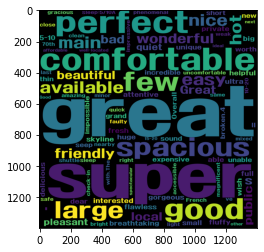

In [ ]:
wc = WordCloud(font_path = '/content/210 역전다방R.ttf'  
, width=700, height=700, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

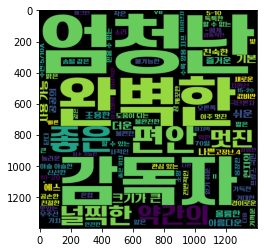

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 

wc = WordCloud(font_path = '/content/210 역전다방R.ttf'  
, width=700, height=700, scale=2.0, max_font_size=250,)
gen = wc.generate_from_frequencies(cko)
plt.figure()
plt.imshow(gen)

In [ ]:
new_lst.columns

Index(['id', 'listing_url', 'picture_url', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'safety', 'wdcloud_eng', 'wdcloud_kor', 'summ',
       'kor_summ', 'neg', 'kor'],
      dtype='object')

In [ ]:
#리스팅 파일 수정 
for i in range(len(new_lst)): 
  eng, ko = wordcloud(new_lst['id'][i])
  new_lst['wdcloud_eng'][i] = eng
  new_lst['wdcloud_kor'][i] = ko

<ipython-input-37-8f7966bbed41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['wdcloud_eng'][i] = eng
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-37-8f7966bbed41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['wdcloud_kor'][i] = ko
/usr/local/lib/python3.8/dist-packages/pandas/core

TypeError: ignored

In [ ]:
new_lst.to_csv('newlist1.csv')

#요약

In [ ]:
def summarization(id): 
  rv = save_reviews_per_id(id) 
  trans=Translator() 
  full_review = ''
  for i in range(len(rv)): 
    clean = re.sub(r"<br/>","",rv[i])
    translator = trans.translate(clean,dest='en')
    full_review += translator.text
  full_review = full_review.strip()

  kor_translator = trans.translate(full_review,dest='ko')
  kor_translator.text
  summ = list()
  kor_summ = list()
  from gensim.summarization.summarizer import summarize
  summ.append(summarize(full_review,0.08))
  kor_summ.append(summarize(kor_translator.text,0.05))
  return summ, kor_summ 

#리스팅 파일 수정 
for i in range(len(new_lst)): 
  print(i)
  summ, kor_summ = summarization(new_lst['id'][i])
  new_lst['summ'][i] = summ
  new_lst['wdcloud_kor'][i] = kor_summ

0


<ipython-input-43-35f0fffeff30>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['summ'][i] = summ
<ipython-input-43-35f0fffeff30>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_lst['wdcloud_kor'][i] = kor_summ


1
2
3
4
5


6
7


WriteError: ignored

In [ ]:
new_lst

,id,listing_url,picture_url,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,review_scores_communication,review_scores_location,review_scores_value,safety,wdcloud_eng,wdcloud_kor,summ,kor_summ,neg,kor
0,2539,https://www.airbnb.com/rooms/2539,https://a0.muscache.com/pictures/3949d073-a02e...,f,Kensington,Brooklyn,9,4.89,4.88,5.00,...,5.00,4.75,4.88,Kensington,2539,[John은 훌륭한 호스트였습니다.],[],2539,2539,2539
1,2595,https://www.airbnb.com/rooms/2595,https://a0.muscache.com/pictures/f0813a11-40b2...,f,Midtown,Manhattan,49,4.68,4.73,4.63,...,4.80,4.81,4.40,Midtown,2595,[Attention: it's on the 4th floor without a li...,[Attention: it's on the 4th floor without a li...,2595,2595,2595
2,5121,https://www.airbnb.com/rooms/5121,https://a0.muscache.com/pictures/2090980c-b68e...,t,Bedford-Stuyvesant,Brooklyn,50,4.52,4.22,4.09,...,4.91,4.47,4.52,Bedford-Stuyvesant,5121,[Garon은 집에 없었음에도 불구하고 우리는 즐거운 시간을 보냈습니다.\n에어비앤...,"[The place is not immaculate, but neat.Garon g...",5121,5121,5121
3,45910,https://www.airbnb.com/rooms/45910,https://a0.muscache.com/pictures/27117627/19ff...,f,Ridgewood,Queens,13,4.42,4.64,4.36,...,5.00,4.82,4.55,Ridgewood,45910,[위치는 지하철 M선과 매우 가까운 안전한 동네에 있으며 L 열차까지 도보로 15분...,"[Would definitely recommend for a large group,...",45910,45910,45910
4,5136,https://www.airbnb.com/rooms/5136,https://a0.muscache.com/pictures/miso/Hosting-...,f,Sunset Park,Brooklyn,3,5.00,5.00,5.00,...,5.00,4.67,5.00,Sunset Park,5136,"[콘도는 넓고 시설이 잘 갖춰져 있으며, 우리 4명이 도시를 둘러본 후 휴식을 취할...",[My family had a wonderful stay at Rebecca and...,5136,5136,5136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,https://www.airbnb.com/rooms/43728504,https://a0.muscache.com/pictures/6c950656-b090...,f,Rockaway Park,Queens,33,4.91,4.97,4.88,...,5.00,4.94,4.88,Rockaway Park,43728504,43728504,43728504,43728504,43728504,43728504
39877,44578886,https://www.airbnb.com/rooms/44578886,https://a0.muscache.com/pictures/dd5163c1-7e02...,t,Upper West Side,Manhattan,52,4.79,4.92,4.75,...,4.96,4.81,4.85,Upper West Side,44578886,44578886,44578886,44578886,44578886,44578886
39878,46355090,https://www.airbnb.com/rooms/46355090,https://a0.muscache.com/pictures/64c81ee7-b396...,f,Bellerose,Queens,11,4.45,4.64,4.27,...,4.36,4.36,4.55,Bellerose,46355090,46355090,46355090,46355090,46355090,46355090
39879,698195550745703156,https://www.airbnb.com/rooms/698195550745703156,https://a0.muscache.com/pictures/miso/Hosting-...,f,Williamsburg,Brooklyn,0,NaN,NaN,NaN,...,NaN,NaN,NaN,Williamsburg,698195550745703156,698195550745703156,698195550745703156,698195550745703156,698195550745703156,698195550745703156


In [ ]:
trans = Translator()
full_review = ''
for i in range(len(rv)): 
  clean = re.sub(r"<br/>","",rv[i])
  translator = trans.translate(clean,dest='en')
  full_review += translator.text
full_review = full_review.strip()

In [ ]:
kor_translator = trans.translate(full_review,dest='ko')
kor_translator.text

'맨해튼에서 몇 분 거리에 있는 슈퍼 아파트: 단점이 없는 장점! 아파트는 넓고 최근 개조되었습니다. 침구는 매우 편안하고 주방은 잘 갖춰져 있으며 무엇이든 빠진 것이 있으면 인도와 그녀의 동반자를 사용할 수 있습니다. 그들은 매우 친절하고 도움이 됩니다. 그들은 아래 아파트에 살고 있지만 우리에게 필요한 모든 정보를 제공하면서 매우 신중했습니다. 동네가 아주 좋습니다. 모퉁이에 음식을 파는 작은 슈퍼마켓과 둘러볼 시간이 없었던 카페 몇 군데가 있습니다. 맨해튼행 버스는 말 그대로 2분 거리에 모퉁이만 돌면 있으며 저녁을 포함해 평일과 주말에 5~10분 간격으로 운행됩니다. 여정은 맨해튼 중심에 있는 항만청까지 약 20분이 소요됩니다. 그리고 금상첨화: 강 건너편에서 바라보는 맨해튼의 고층 건물 전망은 숭고합니다. 그래서 주저 없이 추천합니다. 위치가 좋았습니다. 의사 소통이 이루어졌습니다. 여행은 내가 요청한 모든 것이었습니다. 매우 훌륭한 호스트가 다시 추천합니다! 뉴욕시 근처에 있는 인도의 숙소는 우리 가족에게 완벽했습니다. 우리는 도시를 탐험하는 데 5일을 보냈고 이 아파트는 우리가 바랄 수 있는 모든 것이었습니다. 길 끝에서 버스를 쉽게 잡을 수 있습니다. 아파트에는 숙박에 필요한 모든 것이 갖춰져 있었고 가족이 흩어질 수 있는 공간을 제공했습니다. NYC 스카이라인의 전망은 아름다웠습니다. 인도는 또한 모든 질문에 대해 매우 세심한 호스트였습니다. 뉴욕을 방문하는 데 관심이 있는 모든 사람에게 이 아파트를 추천합니다. 아파트에서 멋진 2주를 보내게 해 준 친애하는 인디아와 친애하는 가브리엘에게 감사합니다! 우리는 여기에서 정말 즐거웠고 둘 다 훌륭한 호스트입니다. 리셉션 자체는 아름다웠습니다. 식탁에 신선한 꽃과 맛있는 초콜릿이 있습니다. 아파트는 크고 세련되게 꾸며져 있습니다. 샴푸, 샤워젤, 핸드크림도 구비되어 있는 점도 좋네요. 침대는 크고 편안하며 이불은 거대하고 푹신합니다. 그리고 아파트에서 바라보는 맨해튼 스카이라인 뷰가 독특하다. 예약 

In [ ]:
text = "Great hostNice room for the price. Great neighborhood. John was very accommodating. Bottles of water in the room were a nice touch and very much appreciated.Very nice apt.  New remodeled.Great place to stay for a while. John is a great host and a great man. The house is very homy. You'll feel right at home..I really enjoyed my time here in deep south Brooklyn and John was an excellent host - very attentive to any concerns that I had and a very welcome presence when he's around. The room itself is a great space with a super-comfy bed and lovely traditional ceiling fan. The street is pleasant, tree-lined and quiet and the townhouse is located a short, convenient walk from the F train, which has been perfect for getting to my office here.It's easy to see why John's a Super Host and I look forward to staying with him again!John was a great host. He was very responsive before and during our visit. He really wanted to make sure we had a good stay. It was our 1st Airbnb experience and wasn't sure what to expect. Was happy to find street parking in a safe neighborhood.Clean, quiet, well-run home, very close to the subwayJohn was always responsive during my stay. He answers back immediately when you request something from him. The neighborhood is very calm and secure. The rooms are clean and John does his best to make comfortable your stay. It takes approximately 45 minutes by subway to reach Manhattan mid-town and the house is located one block to the subway station. I recommend John's place."
len(text
)

1509

In [ ]:
from gensim.summarization.summarizer import summarize
print(summarize(full_review,0.05))
print(summarize(kor_translator.text,0.05))


Super great host would recommend again!India's place near New York City was perfect for our family.
We can recommend the apartment without reservation!India's house is perfect for a family stay in NY!
Very comfortable and super well equipped We did not meet our host but she was able to answer all our requests Thank you againGreat place and close to NY!India's apartment is super great, for anyone who wants to see New York, I would recommend coming here you have a breathtaking view of the New York skyline every day!The apartment is large, very spacious and there is everything you need.Always gladly again!The apartment is really super clean, nicely furnished and you can be in the city within a few minutes by bus.
Host took care to stock some good coffee pods which was super sweet of her.The apartment is simply perfect to spend a few days in New York.
Great views of Manhattan and only 20 minutes in on shuttle bus.
침구는 매우 편안하고 주방은 잘 갖춰져 있으며 무엇이든 빠진 것이 있으면 인도와 그녀의 동반자를 사용할 수 있습니다.
우리는 도시를 탐험

In [ ]:
s = trans.translate(rv[0],dest='en')
ss = summarize(s.text,0.1)

In [ ]:
ss

'Super apartment a few minutes from Manhattan: the advantages without the disadvantages!'

##감정 분석 

In [ ]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
dictin = trans.translate('씨끄려윤고 씨러하시눈분은 피하셰요<br/>이집 딸래미나 엄먀가 씻율때마댜 으막 크게 틀어눃움,,,<br/><br/>친절하시낀한뎨 집이 짝꼬 한층이고 옆뱡이량 호ㅑ장실다 부터잇서서 프랴이뻐씨 잘 없듬.<br/><br/>집은 깔끔하긴함',dest='en')
dicti = SentimentIntensityAnalyzer().polarity_scores(dictin.text)
dicti

{'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.7763}

In [ ]:
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

reviews['sentimental'] = np.array([-1]*1064458)

def add_sent(id): 
  for i in range(len(reviews)): 
    if id == reviews['listing_id'][i]: 
      clean = re.sub(r"<br/>","",reviews['comments'][i])
      translator = trans.translate(clean,dest='en')
      sent = SentimentIntensityAnalyzer().polarity_scores(translator.text)
      if list(sent.values())[0] > 0.1 : 
        reviews['sentimental'][i] = 1
  return reviews[reviews['listing_id'] == id] 

new_reviews = add_sent(20862285)
new_reviews 

Avoid those who are shy and squeamish. Every time the daughter or mother of this house is washing, it turns up loudly,,,The house is kind and kind. .The house is tidy


<ipython-input-210-015d13c96873>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentimental'][i] = 1


,listing_id,id,date,reviewer_id,reviewer_name,comments,sentimental
546250,20862285,196622779,2017-09-23,371124,Bonny,The host canceled this reservation 7 days befo...,-1
546251,20862285,198773481,2017-09-30,60065199,Ana Paula,Lilianas place is amazing! If you’re looking f...,-1
546252,20862285,210292188,2017-11-08,153440512,Ling,"Liliana and her family are courteous, consider...",-1
546253,20862285,278674891,2018-06-18,66393159,Sabrina,I would definitely stay at Liliana place again.,-1
546254,20862285,284552321,2018-07-01,96658540,Dr. Sneha,Lilian is an amazing host. She was welcoming a...,-1
546255,20862285,293567095,2018-07-20,33945046,Woo,great stay!,-1
546256,20862285,309759650,2018-08-18,49713625,Irem,"the location is good, they are good family and...",-1
546257,20862285,319493641,2018-09-06,121740399,Sofie,Liliana and her family were very welcoming. Th...,-1
546258,20862285,326573575,2018-09-22,189940251,Flora Mae,I'd like to recommend you to stay at Liliana's...,-1
546259,20862285,339475518,2018-10-21,89475326,Cindy,I would Highly recommend Liliana's place!<br/>...,-1


In [ ]:
new_reviews[new_reviews['sentimental'] == 1]

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentimental
546263,20862285,422602106,2019-03-11,81587758,소현,씨끄려윤고 씨러하시눈분은 피하셰요<br/>이집 딸래미나 엄먀가 씻율때마댜 으막 크게...,1


##한국어 감지

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=6e13215be7fb570bb8d98e49bc22033484b5adf692b725d01383e171efc7c6ab
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
from langdetect import detect
#20914425

def detect_kor(id): 
  for i in range(len(reviews)): 
    if id == reviews['listing_id'][i]: 
      detected = detect(reviews['comments'][i]) 
      if detected == 'ko': 
        print(reviews['comments'][i])

detect_kor(20914425)

미국의 가정집을 경험하기에 최고였어요. <br/>주인의 세심한 배려 감사합니다.
